In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"})
X = iris_frame.iloc[:,:-1]
Y = iris_frame.iloc[:,[-1]]
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.cluster import KMeans
df1 = iris_frame[["sepal length (cm)" , "sepal width (cm)" ]]

#모델 생성 및 예측
model = KMeans(n_clusters = 3, algorithm='auto')
model.fit(df1)
predict = pd.DataFrame(model.predict(df1))
predict.columns = ['predict']

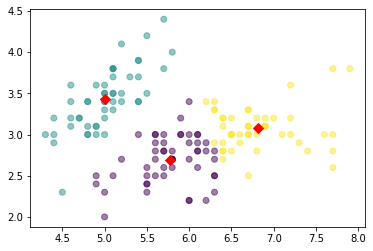

In [4]:
r = pd.concat([df1,predict],axis=1)
plt.scatter(r["sepal length (cm)"] , 
            r["sepal width (cm)" ], 
            c=r['predict'],
                alpha=0.5)

centers = pd.DataFrame(model.cluster_centers_,
                       columns = ["sepal length (cm)" , "sepal width (cm)" ])

center_x = centers["sepal length (cm)"]
center_y = centers["sepal width (cm)"]
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

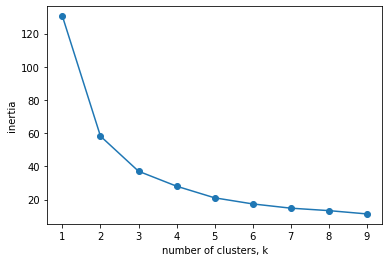

In [5]:
ks = range(1,10)
iner=[]

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df1)
    iner.append(model.inertia_)
plt.plot(ks,iner,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

C:\Users\dm705\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\dm705\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


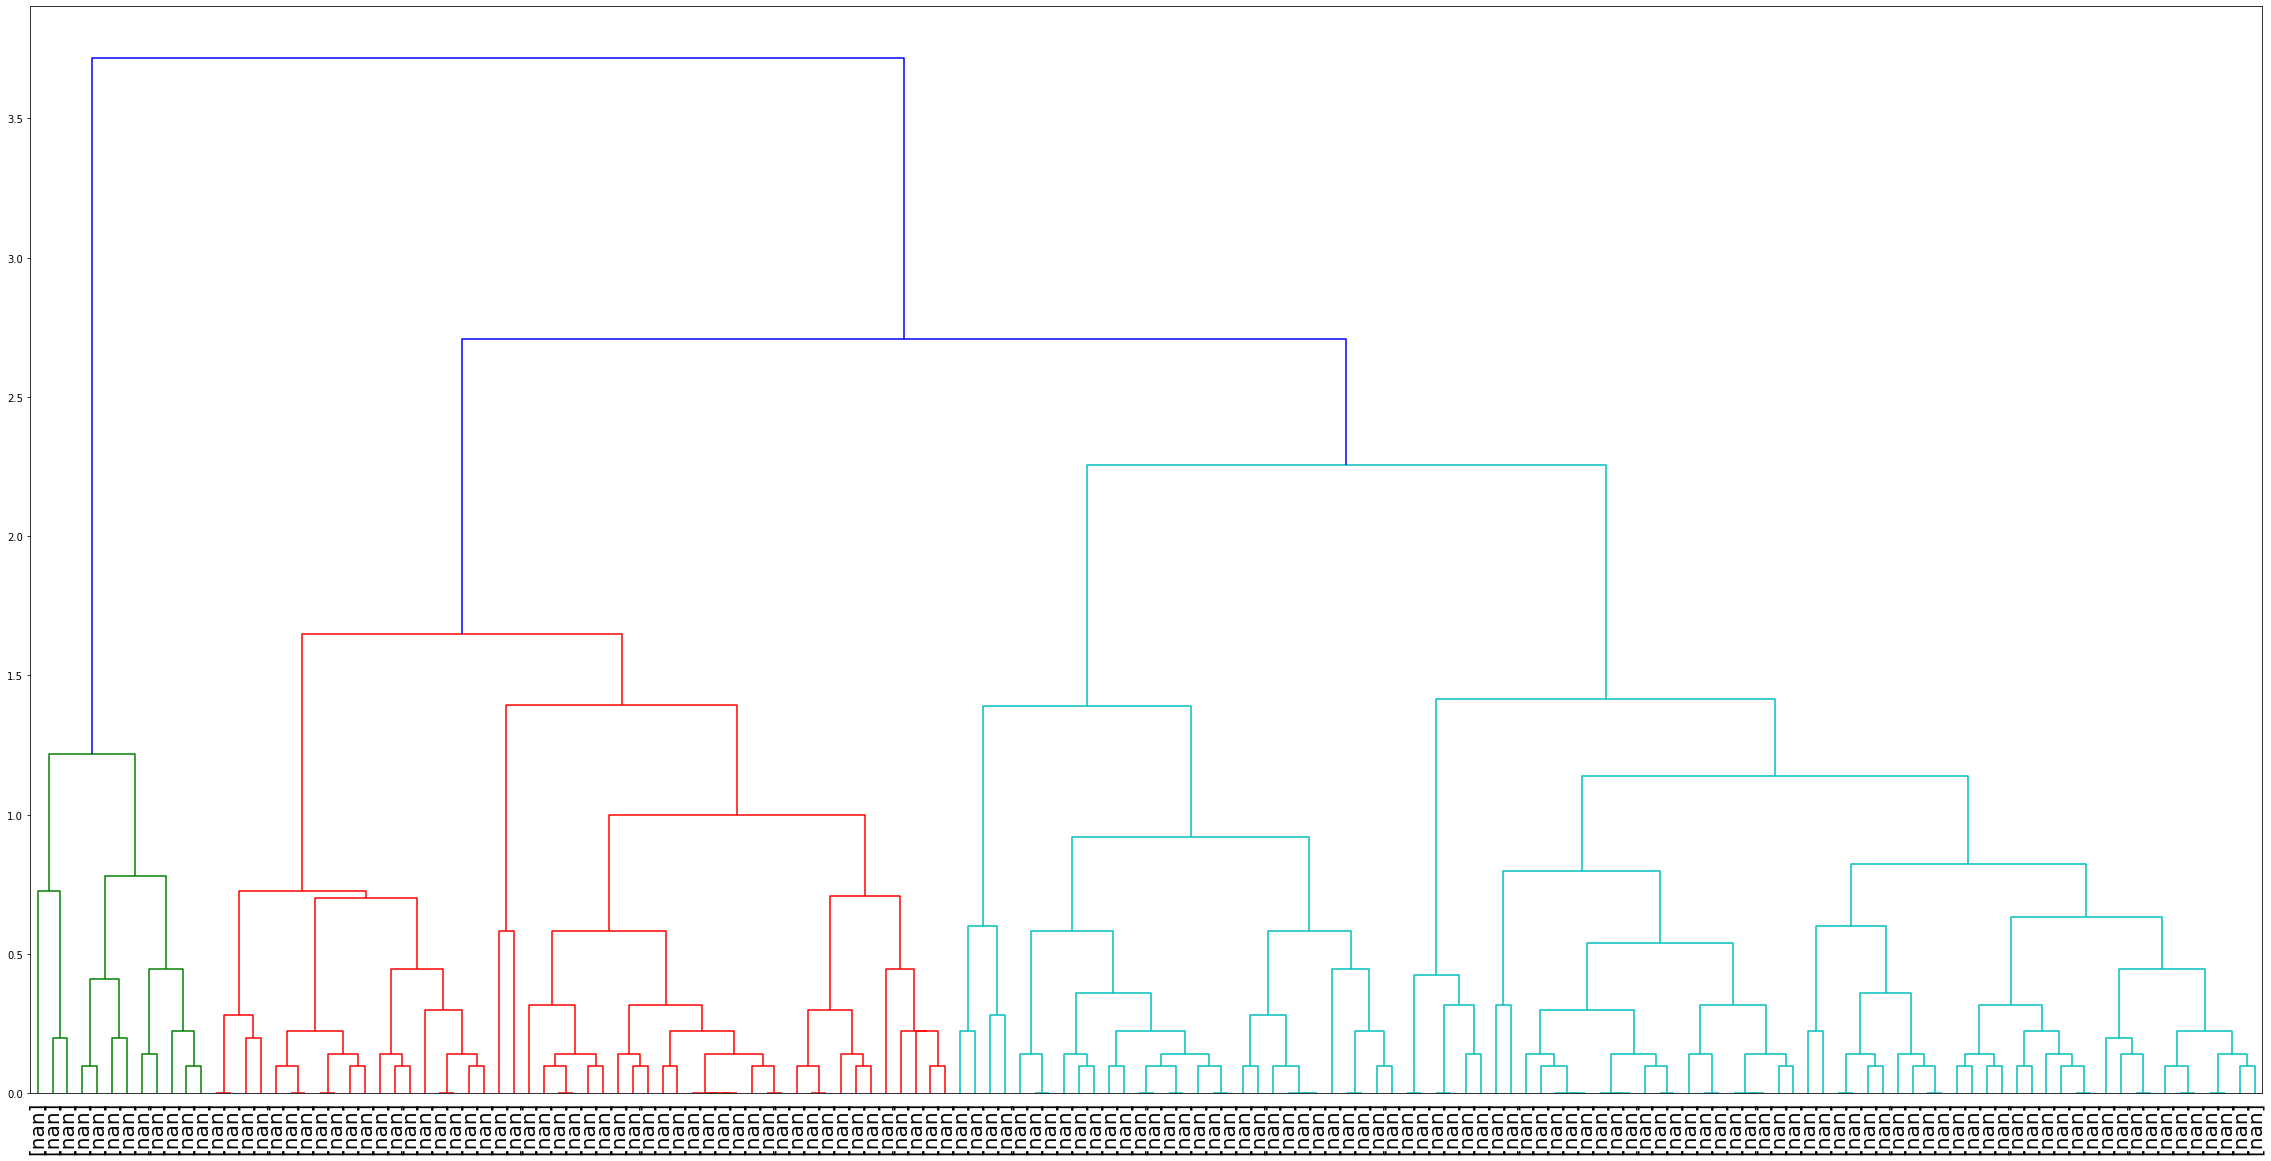

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(df1,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = Y.as_matrix(columns=['predicts']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

C:\Users\dm705\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


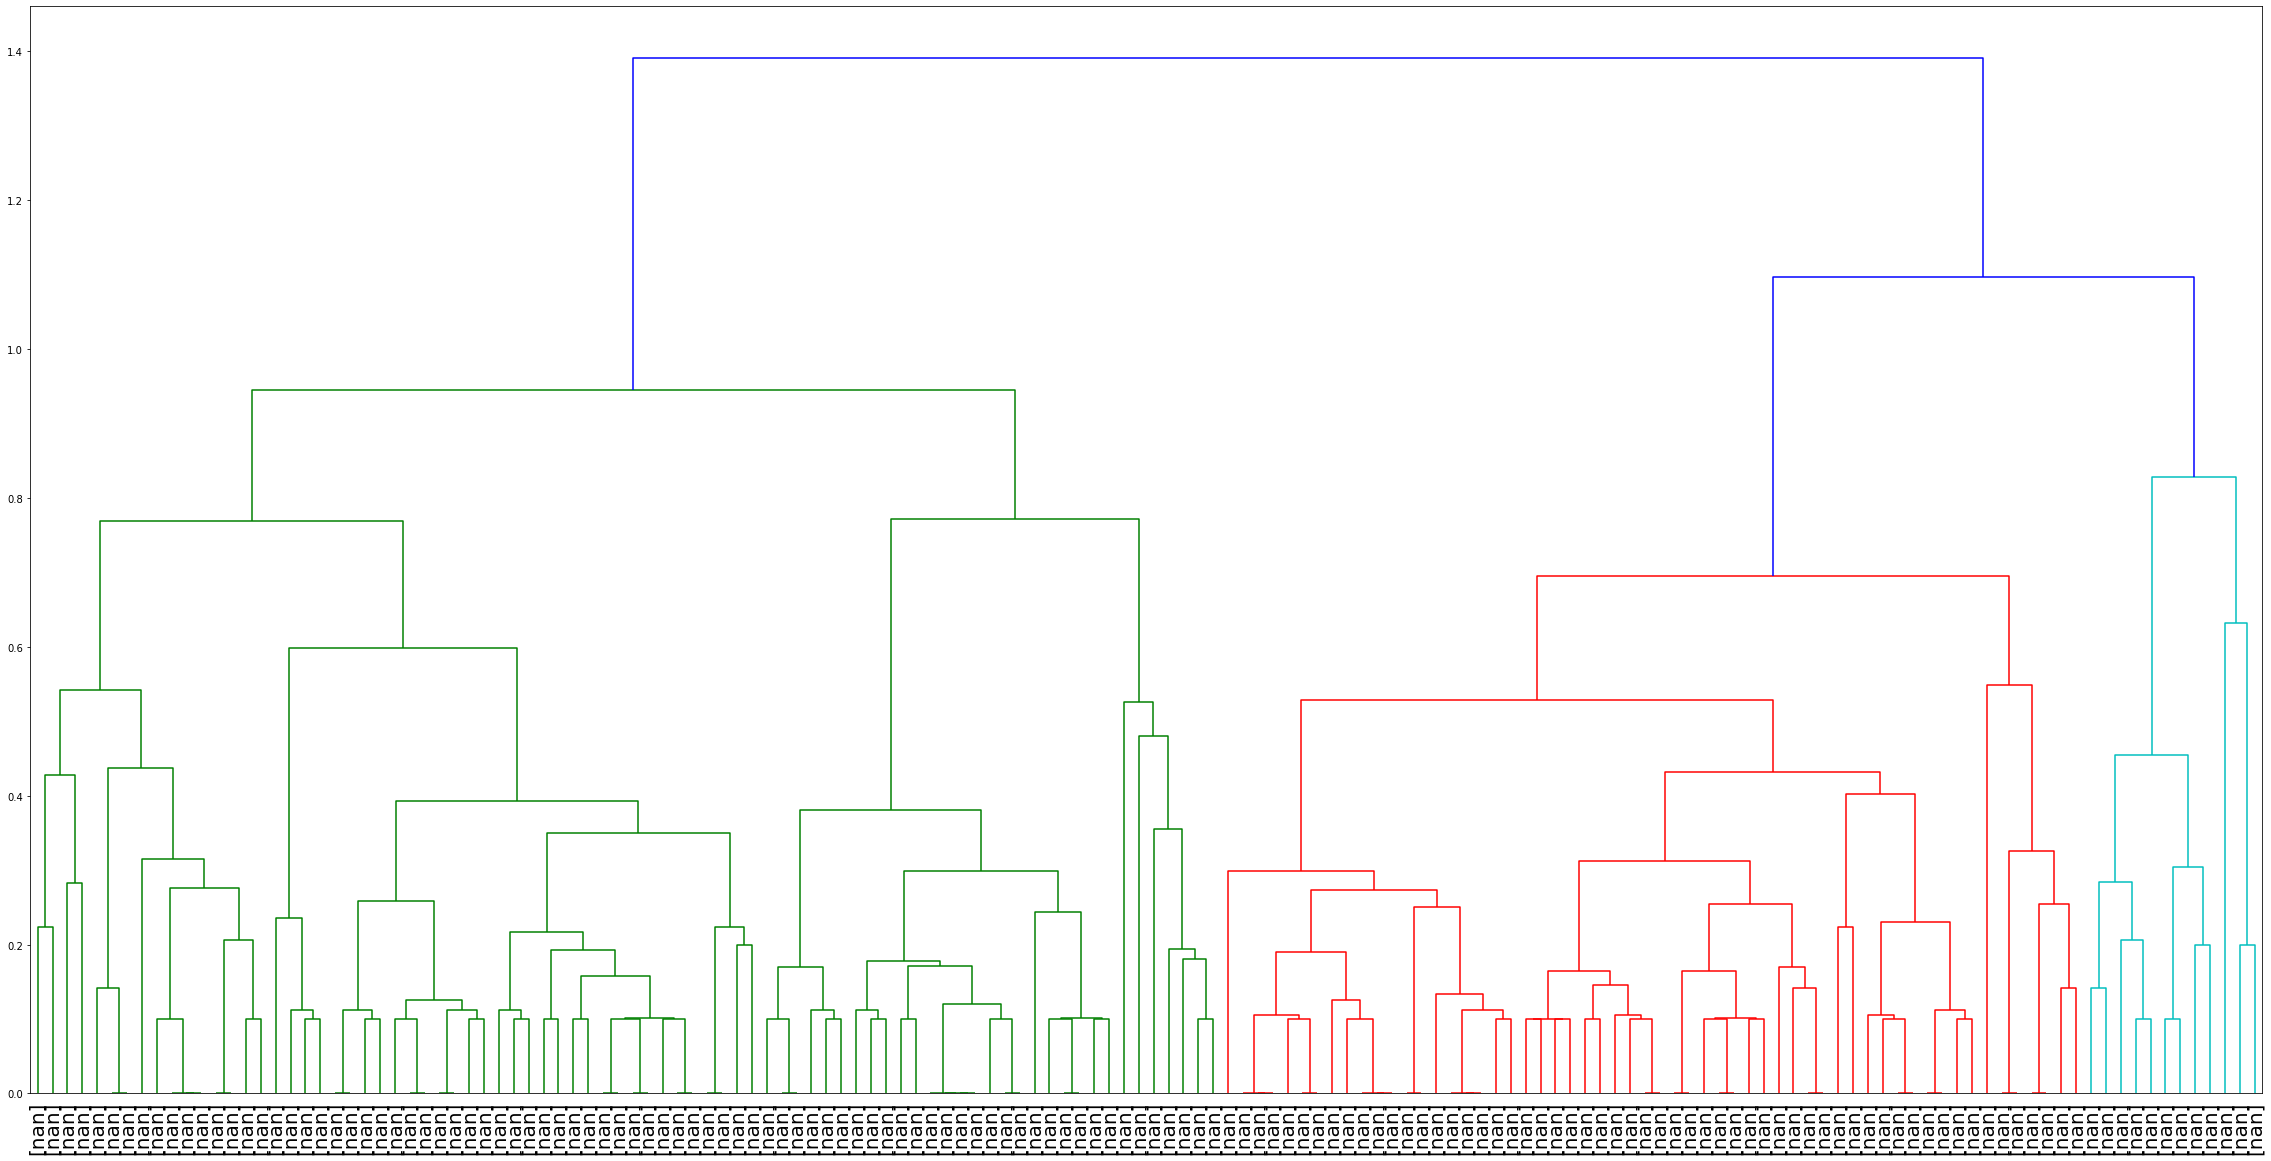

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(df1,method='centroid')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = Y.as_matrix(columns=['predicts']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()